# Applied Data Science Capstone

## Introduction/Business Problem

The Seattle government is concerned with the severity and number of accidents and wants to employ actions based on the analysis of historical data to alert drivers of the imminence of accidents. This study aims to predict the severity of an accident, given the locations, weather and road conservation. The analysis aims to determine a set of possible causes that contribute to the increase in the severity of accidents to allow preventive actions by road users. The targets audience of the project are drivers, rescue groups, police and insurance companys. It's expected to achieve a reduction in the number and severity of accidents to make drivers and passengers more secure.

## About dataset

This dataset is about collisions that occurred between 2004 and 2020 in the city of Seattle. The __Data-Collisions.csv__ data set includes details of 194673 collisions provided by the Seattle Department of Transportation Traffic Management Division. It includes following fields:

| Field | Description |
| --- | --- |
| OBJECTID | ESRI unique identifier |
| LATITUDE | ESRI geometry field |
| LONGITUDE | ESRI geometry field |
| ADDRTYPE | Collision address type (Alley/Block/Intersection) |
| INTKEY | Key that corresponds to the intersection associated with a collision |
| LOCATION | Description of the general location of the collision |
| SEVERITYCODE | A code that corresponds to the severity of the collision (3 — fatality/2b — serious injury/2—injury/1 — prop damage/0 — unknown) |
| SEVERITYDESC | A detailed description of the severity of the collision |
| COLLISIONTYPE | Collision type |
| PERSONCOUNT | The total number of people involved in the collision |
| PEDCOUNT | The number of pedestrians involved in the collision |
| PEDCYLCOUNT | The number of bicycles involved in the collision |
| VEHCOUNT | The number of vehicles involved in the collision |
| INJURIES | The number of total injuries in the collision |
| SERIOUSINJURIES | The number of serious injuries in the collision |
| FATALITIES | The number of fatalities in the collision |
| INCDTTM | The date and time of the incident |
| JUNCTIONTYPE | Category of junction at which collision took place |
| SDOT_COLDESC | A description of the collision corresponding to the collision code |
| INATTENTIONIND | Whether or not collision was due to inattention (Y/N) |
| UNDERINFL | Whether or not a driver involved was under the influence of drugs or alcohol |
| WEATHER | A description of the weather conditions during the time of the collision |
| ROADCOND | The condition of the road during the collision |
| LIGHTCOND | The light conditions during the collision |
| PEDROWNOTGRNT | Whether or not the pedestrian right of way was not granted (Y/N) |
| SPEEDING | Whether or not speeding was a factor in the collision (Y/N) |
| SEGLANEKEY | A key for the lane segment in which the collision occurred |
| CROSSWALKKEY | A key for the crosswalk at which the collision occurred |
| HITPARKEDCAR | Whether or not the collision involved hitting a parked car (Y/N) |


## Methodology

### Reading and saving the Data 

Downloading the data set and loading the data from the CSV file

In [1]:
# Import pandas library
import pandas as pd
# Read the online file by the URL and assign it to variable "df"
url = 'https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv'
df = pd.read_csv(url, low_memory=False)

In [2]:
# show the first 5 rows using dataframe.head() method
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


In [3]:
# Get a statistical summary
df.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,214260.000000,214260.000000,221738.000000,221738.000000,221738.000000,72027.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221737.000000,1.272050e+05,221738.000000,2.217380e+05
mean,-122.330753,47.620191,110869.500000,145006.735517,145236.969811,37636.986713,2.226741,0.038095,0.027352,1.729442,0.373964,0.015203,0.001700,13.383305,7.971063e+06,262.624791,9.568044e+03
std,0.030058,0.056059,64010.391332,89372.351774,89749.554004,52000.820955,1.469699,0.201704,0.164512,0.830529,0.732050,0.158004,0.044967,7.298289,2.611523e+06,3252.882590,7.142784e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577106,55435.250000,71721.250000,71721.250000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330363,47.616033,110869.500000,127358.500000,127358.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664290,166303.750000,210118.750000,210338.750000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,221738.000000,334276.000000,335776.000000,764413.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [4]:
# A concise summary of your DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   OBJECTID         221738 non-null  int64  
 3   INCKEY           221738 non-null  int64  
 4   COLDETKEY        221738 non-null  int64  
 5   REPORTNO         221738 non-null  object 
 6   STATUS           221738 non-null  object 
 7   ADDRTYPE         218024 non-null  object 
 8   INTKEY           72027 non-null   float64
 9   LOCATION         217145 non-null  object 
 10  EXCEPTRSNCODE    101335 non-null  object 
 11  EXCEPTRSNDESC    11785 non-null   object 
 12  SEVERITYCODE     221737 non-null  object 
 13  SEVERITYDESC     221738 non-null  object 
 14  COLLISIONTYPE    195287 non-null  object 
 15  PERSONCOUNT      221738 non-null  int64  
 16  PEDCOUNT         221738 non-null  int6

In [5]:
# Representing the dimensionality of the DataFrame
df.shape

(221738, 40)

### Data Wrangling

In [6]:
import numpy as np

In [7]:
# Evaluating for Missing Data
missing_data = df.isnull()
missing_data.head(5)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


#### Count missing values in each column

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

X
False    214260
True       7478
Name: X, dtype: int64

Y
False    214260
True       7478
Name: Y, dtype: int64

OBJECTID
False    221738
Name: OBJECTID, dtype: int64

INCKEY
False    221738
Name: INCKEY, dtype: int64

COLDETKEY
False    221738
Name: COLDETKEY, dtype: int64

REPORTNO
False    221738
Name: REPORTNO, dtype: int64

STATUS
False    221738
Name: STATUS, dtype: int64

ADDRTYPE
False    218024
True       3714
Name: ADDRTYPE, dtype: int64

INTKEY
True     149711
False     72027
Name: INTKEY, dtype: int64

LOCATION
False    217145
True       4593
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     120403
False    101335
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     209953
False     11785
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE
False    221737
True          1
Name: SEVERITYCODE, dtype: int64

SEVERITYDESC
False    221738
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    195287
True      26451
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    22

#### Drop all rows that do not have SEVERITYCODE data

In [9]:
df = df.dropna(subset=["SEVERITYCODE"], axis=0)

In [10]:
df.drop(["OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "STATUS", "INTKEY", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "INCDATE", "JUNCTIONTYPE", "SDOT_COLCODE", "SDOTCOLNUM", "ST_COLDESC"], axis=1, inplace=True)

In [11]:
df.shape

(221737, 27)

In [12]:
df.dtypes

X                  float64
Y                  float64
ADDRTYPE            object
LOCATION            object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDTTM             object
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SPEEDING            object
ST_COLCODE          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
HITPARKEDCAR        object
dtype: object

#### Convert data types to proper format

In [13]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDTTM'].head()

0   2020-01-19 09:01:00
1   2005-04-11 18:31:00
2   2013-03-31 02:09:00
3   2020-01-06 17:55:00
4   2009-12-25 19:00:00
Name: INCDTTM, dtype: datetime64[ns]

In [14]:
df['SPEEDING'].fillna('N', inplace=True)
df['SPEEDING'].value_counts()

N    211801
Y      9936
Name: SPEEDING, dtype: int64

In [15]:
df.columns.values

array(['X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDTTM',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], dtype=object)

In [16]:
df['YEARS'] = pd.DatetimeIndex(df['INCDTTM']).year
years = df['YEARS']
years = years.tolist()

In [17]:
df1 = df[['YEARS', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES']]
df_years_severity = df1.groupby(years)['INJURIES', 'SERIOUSINJURIES', 'FATALITIES'].sum().transpose()
df_years_severity

<ipython-input-17-25f6c55f61e3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_years_severity = df1.groupby(years)['INJURIES', 'SERIOUSINJURIES', 'FATALITIES'].sum().transpose()


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
INJURIES,0,5393,6451,6239,5713,5358,4787,4711,4348,4853,4643,4897,5125,5073,4747,4576,4192,1816
SERIOUSINJURIES,0,243,223,318,263,205,214,210,155,182,180,185,189,174,173,192,177,88
FATALITIES,0,30,30,42,14,20,24,20,11,22,24,18,21,24,21,14,26,16


In [18]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Comparing the trend of serious injuries or fatalities in the line graph

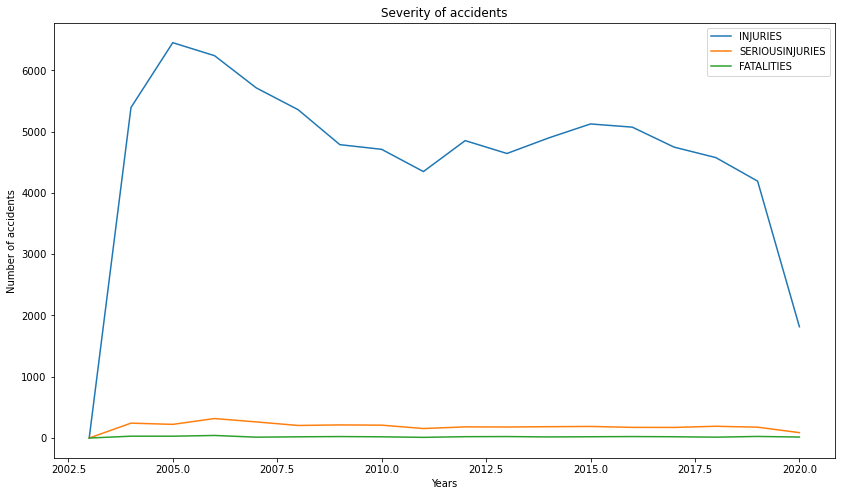

In [19]:
#df_years_severity.index = df_years_severity.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_years_severity = df_years_severity.transpose()
df_years_severity.plot(kind='line', figsize=(14,8))
plt.title('Severity of accidents')
plt.ylabel('Number of accidents')
plt.xlabel('Years')
plt.show()

In [20]:
import folium
from folium import plugins

In [21]:
injuries = df['INJURIES'].sum()
injuries

82922

In [22]:
serious_injuries = df['SERIOUSINJURIES'].sum()
serious_injuries

3371

In [23]:
fat_count = df['FATALITIES'].sum()
fat_count

377

#### Superimposing the location of accidents on the map

In [24]:
avg_longitude = df["X"].astype("float").mean(axis=0)
avg_latitude = df["Y"].astype("float").mean(axis=0)
df_incidents = df.dropna(subset=["X", "Y"], axis=0)
df_incidents_graves = df_incidents.loc[df_incidents['SEVERITYCODE'] == '3']

In [25]:
# define the world map
world_map = folium.Map(location=[round(avg_latitude, 2), round(avg_longitude, 2)], zoom_start=10, tiles='OpenStreetMap')

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents_graves.Y, df_incidents_graves.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# display world map
world_map.add_child(incidents)

In [26]:
locations = df.pivot_table(index=['LOCATION'], aggfunc='size')
locations.sort_values(ascending=False).head()

LOCATION
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          297
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    283
6TH AVE AND JAMES ST                                              276
dtype: int64

In [27]:
collision_descr = df.pivot_table(index=['SDOT_COLDESC'], aggfunc='size')
collision_descr.sort_values(ascending=False).head()

SDOT_COLDESC
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE     92182
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END               59371
NOT ENOUGH INFORMATION / NOT APPLICABLE                    19164
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE    10945
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT               9609
dtype: int64

## K-Nearest Neighbors algorithm

In [28]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [29]:
df[['SEVERITYCODE','SEVERITYDESC','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','ADDRTYPE','COLLISIONTYPE']]

,SEVERITYCODE,SEVERITYDESC,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,COLLISIONTYPE
0,1,Property Damage Only Collision,Clear,Dry,Daylight,N,Intersection,Angles
1,1,Property Damage Only Collision,Raining,Wet,Dusk,N,Block,Rear Ended
2,2,Injury Collision,Clear,Dry,Dark - Street Lights On,N,Block,Head On
3,2,Injury Collision,Raining,Wet,Dark - Street Lights On,N,Intersection,Pedestrian
4,2,Injury Collision,Clear,Ice,Dark - Street Lights On,Y,Block,Other
...,...,...,...,...,...,...,...,...
221733,0,Unknown,NaN,NaN,NaN,N,Block,NaN
221734,1,Property Damage Only Collision,Clear,Dry,Daylight,N,Block,Sideswipe
221735,2,Injury Collision,Clear,Dry,Daylight,N,Intersection,Angles
221736,2,Injury Collision,Clear,Dry,Daylight,Y,Intersection,Angles


The following characteristics of the dataset will be used to make the predictions
1. WEATHER;
2. ROADCOND;
3. LIGHTCOND;
4. SPEEDING;
5. ADDRTYPE;
6. COLLISIONTYPE.

In [30]:
df = df.dropna(subset=['SEVERITYCODE','SEVERITYDESC','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','ADDRTYPE','COLLISIONTYPE'], axis=0)

In [31]:
df.shape

(192988, 28)

In [32]:
df['WEATHER_CODE'] = pd.factorize(df.WEATHER)[0]
df['ROADCOND_CODE'] = pd.factorize(df.ROADCOND)[0]
df['LIGHTCOND_CODE'] = pd.factorize(df.LIGHTCOND)[0]
df['SPEEDING_CODE'] = pd.factorize(df.SPEEDING)[0]
df['ADDRTYPE_CODE'] = pd.factorize(df.SPEEDING)[0]
df['COLLISIONTYPE_CODE'] = pd.factorize(df.SPEEDING)[0]

In [33]:
df.columns.values

array(['X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDTTM',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'YEARS',
       'WEATHER_CODE', 'ROADCOND_CODE', 'LIGHTCOND_CODE', 'SPEEDING_CODE',
       'ADDRTYPE_CODE', 'COLLISIONTYPE_CODE'], dtype=object)

### Define feature sets

In [34]:
X = df[['WEATHER_CODE','ROADCOND_CODE','LIGHTCOND_CODE','SPEEDING_CODE','ADDRTYPE_CODE','COLLISIONTYPE_CODE']]
X[0:5]

,WEATHER_CODE,ROADCOND_CODE,LIGHTCOND_CODE,SPEEDING_CODE,ADDRTYPE_CODE,COLLISIONTYPE_CODE
0,0,0,0,0,0,0
1,1,1,1,0,0,0
2,0,0,2,0,0,0
3,1,1,2,0,0,0
4,0,2,2,1,1,1


Our label

In [35]:
y = df['SEVERITYCODE'].values
y[0:5]

array(['1', '1', '2', '2', '2'], dtype=object)

### Normalize Data

In [36]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.68227241, -0.56627799, -0.70470271, -0.23210105, -0.23210105,
        -0.23210105],
       [ 0.21869094,  0.53226101,  0.09010742, -0.23210105, -0.23210105,
        -0.23210105],
       [-0.68227241, -0.56627799,  0.88491755, -0.23210105, -0.23210105,
        -0.23210105],
       [ 0.21869094,  0.53226101,  0.88491755, -0.23210105, -0.23210105,
        -0.23210105],
       [-0.68227241,  1.6308    ,  0.88491755,  4.30846831,  4.30846831,
         4.30846831]])

### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (154390, 6) (154390,)
Test set: (38598, 6) (38598,)


### Classification
K nearest neighbor (KNN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

Training

In [39]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

Predicting

In [40]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['1', '1', '1', '1', '1'], dtype=object)

Accuracy classification score

In [41]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6366409741563572
Test set Accuracy:  0.6327270843048862


### Discussion of results

The use of a machine learning model for predicting the severity of an automobile accident reached an accuracy around of  0.636 for the training set and 0.632 for the test set.

### Conclusion

From the analysis of the information obtained from the Seattle Department of Transportation Traffic Management Division we can conclude that the weather conditions, the state of conservation of roads, the lighting and the speed of traffic can have an aggravating impact in the case of automobile accidents.